In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodykit.lab import *
from nbodykit import setup_logging, style
plt.style.use(style.notebook)
import h5py

from pmesh.pm import ParticleMesh, RealField, ComplexField

from nbodykit.source.catalog import ArrayCatalog
from nbodykit.source.catalog import HDFCatalog
from nbodykit.lab import ArrayMesh

/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from astropy.cosmology import Planck18 as cosmo

In [3]:
def read_dat_file(file_path):
    # Assuming the data in the .dat file is space-separated
    data = np.loadtxt(file_path)
    return data

def read_h5_file(file_path, dataset_name):
    with h5py.File(file_path, 'r') as file:
        dataset = file[dataset_name]
        data = np.array(dataset)
    return data

In [4]:
class_data =[]
for i in [100, 30, 10, 3, 0]:
    data = read_dat_file('/Users/Io_1/Desktop/gevolution/classdata/classdata' + str(i)+ '.dat')
    class_data.append(data)

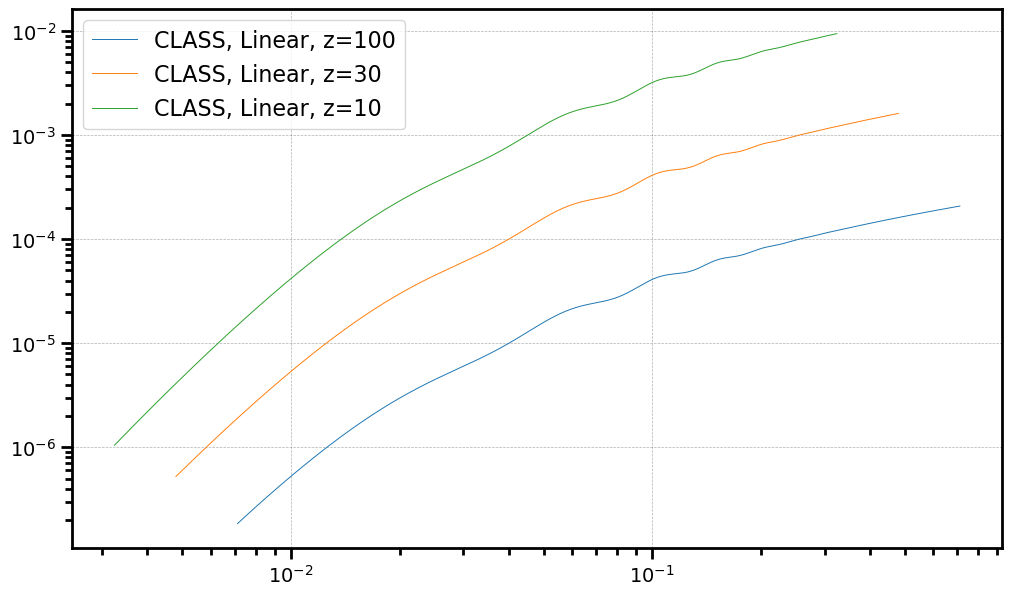

In [5]:
plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear, z=100')
plt.loglog(class_data[1][0,:], (1/(2*np.pi**2))*class_data[1][0,:]**3*class_data[1][1,:], linewidth=0.7, label='CLASS, Linear, z=30')
plt.loglog(class_data[2][0,:], (1/(2*np.pi**2))*class_data[2][0,:]**3*class_data[2][1,:], linewidth=0.7, label='CLASS, Linear, z=10')
plt.legend()

# Trying out different template files

Plotting data at fixed tiling factor (32) and ngrid (80).

In [6]:
def data_getter(x):
    dsc1 = read_dat_file('/Users/Io_1/Desktop/gevolution/templates/outputsc1/lcdm_pk00' + str(x)+'_delta.dat')
    dsc0 = read_dat_file('/Users/Io_1/Desktop/gevolution/templates/outputsc0/lcdm_pk00' + str(x)+'_delta.dat')
    dfcc =read_dat_file('/Users/Io_1/Desktop/gevolution/templates/outputfcc/lcdm_pk00' + str(x)+'_delta.dat')
    dbcc =read_dat_file('/Users/Io_1/Desktop/gevolution/templates/outputbcc/lcdm_pk00' + str(x)+'_delta.dat')
    return dsc1, dsc0, dfcc, dbcc

num_files = 5
deltasc1 = []
deltasc0 = []
deltafcc = []
deltabcc = []


for i in range(num_files):
    dsc1, dsc0, dfcc, dbcc  = data_getter(i)
    deltasc1.append(dsc1)
    deltasc0.append(dsc0)
    deltafcc.append(dfcc)
    deltabcc.append(dbcc)

part_infosc1 = read_h5_file('/Users/Io_1/Desktop/gevolution/templates/outputsc1/lcdm_snap001_cdm.h5', 'part_info')
part_infosc0 = read_h5_file('/Users/Io_1/Desktop/gevolution/templates/outputsc0/lcdm_snap001_cdm.h5', 'part_info')
part_infofcc = read_h5_file('/Users/Io_1/Desktop/gevolution/templates/outputfcc/lcdm_snap001_cdm.h5', 'part_info')
part_infobcc = read_h5_file('/Users/Io_1/Desktop/gevolution/templates/outputbcc/lcdm_snap001_cdm.h5', 'part_info')

print(part_infosc1, part_infosc0, part_infofcc, part_infobcc)

def h5_getter(x):
    hsc1 = read_h5_file('/Users/Io_1/Desktop/gevolution/templates/outputsc1/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    hsc0 = read_h5_file('/Users/Io_1/Desktop/gevolution/templates/outputsc0/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    hfcc = read_h5_file('/Users/Io_1/Desktop/gevolution/templates/outputfcc/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    hbcc = read_h5_file('/Users/Io_1/Desktop/gevolution/templates/outputfcc/lcdm_snap00' + str(x)+ '_cdm.h5', 'data')
    return hsc1, hsc0, hfcc, hbcc

snapssc1 = []
snapssc0 = []
snapsfcc = []
snapsbcc = []

for i in range(num_files):
    hsc1, hsc0, hfcc, hbcc = h5_getter(i)
    snapssc1.append(hsc1)
    snapssc0.append(hsc0)
    snapsfcc.append(hfcc)
    snapsbcc.append(hbcc)
    
datasc1 =[]
datasc0 = []
datafcc = []
databcc = []

for i in np.arange(5):
    positionsc1 =[]
    positionsc0 =[]
    positionfcc =[]
    positionbcc =[]
    mass = []
    massfcc = []
    massbcc = []

#had to multiply all positions by boxsize to rescale it....
    for j in np.arange(len(snapssc1[i]['positionX'])):
        positionsc1.append([snapssc1[i]['positionX'][j]*400, snapssc1[i]['positionY'][j]*400, snapssc1[i]['positionZ'][j]*400])
        positionsc0.append([snapssc0[i]['positionX'][j]*400, snapssc0[i]['positionY'][j]*400, snapssc0[i]['positionZ'][j]*400])
        mass.append(1.48795166e-07)
    for j in np.arange(len(snapsfcc[i]['positionX'])):
        positionfcc.append([snapsfcc[i]['positionX'][j]*400, snapsfcc[i]['positionY'][j]*400, snapsfcc[i]['positionZ'][j]*400])
        massfcc.append(2.97590332e-07)
    for j in np.arange(len(snapsbcc[i]['positionX'])):
        positionbcc.append([snapsbcc[i]['positionX'][j]*400, snapsbcc[i]['positionY'][j]*400, snapsbcc[i]['positionZ'][j]*400])
        massbcc.append(5.95180665e-07)

    data2 = numpy.empty(len(snapssc1[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data2['Position'] = np.array(positionsc1)
    data2['Mass'] = np.array(mass)
    data4 = numpy.empty(len(snapssc0[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data4['Position'] = np.array(positionsc0)
    data4['Mass'] = np.array(mass)
    data8 = numpy.empty(len(snapsfcc[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data8['Position'] = np.array(positionfcc)
    data8['Mass'] = np.array(massfcc)
    data9 = numpy.empty(len(snapsbcc[i]['positionX']), dtype=[('Position', ('f8', 3)), ('Mass', 'f8')])
    data9['Position'] = np.array(positionbcc)
    data9['Mass'] = np.array(massbcc)

    datasc1.append(data2)
    datasc0.append(data4)
    datafcc.append(data8)
    databcc.append(data9)

arraysc1 = []
arraysc0 = []
arrayfcc = []
arraybcc = []

for i in np.arange(5):
    f2 = ArrayCatalog(datasc0[i])
    mesh2 = f2.to_mesh(Nmesh=80, BoxSize=400)
    r2 = FFTPower(mesh2, mode='1d', dk=0.005, kmin=0.0001)
    Pk2 = r2.power
    arraysc1.append(Pk2)

    f4 = ArrayCatalog(datasc1[i])
    mesh4 = f4.to_mesh(Nmesh=80, BoxSize=400)
    r4 = FFTPower(mesh4, mode='1d', dk=0.005, kmin=0.0001)
    Pk4 = r4.power
    arraysc0.append(Pk4)

    f8 = ArrayCatalog(datafcc[i])
    mesh8 = f8.to_mesh(Nmesh=80, BoxSize=400)
    r8 = FFTPower(mesh8, mode='1d', dk=0.005, kmin=0.0001)
    Pk8 = r8.power
    arrayfcc.append(Pk8)

    f9 = ArrayCatalog(databcc[i])
    mesh9 = f9.to_mesh(Nmesh=80, BoxSize=400)
    r9 = FFTPower(mesh9, mode='1d', dk=0.005, kmin=0.0001)
    Pk9 = r9.power
    arraybcc.append(Pk9)

[(1.48795166e-07, 0, 11052, b'part_simple')] [(1.48795166e-07, 0, 11091, b'part_simple')] [(2.97590332e-07, 0, 11144, b'part_simple')] [(5.95180665e-07, 0, 11067, b'part_simple')]


In [15]:
part_infosc1[0][0]/part_infobcc[0][0]


0.25

Shot noise is quite large for Nbody fits, so I am not factoring it in. 

In [7]:
arrayfcc[0].attrs

{'Nmesh': array([80, 80, 80]),
 'BoxSize': array([400., 400., 400.]),
 'Lx': 400.0,
 'Ly': 400.0,
 'Lz': 400.0,
 'volume': 64000000.0,
 'mode': '1d',
 'los': [0, 0, 1],
 'Nmu': 1,
 'poles': [],
 'dk': 0.005,
 'kmin': 0.0001,
 'kmax': None,
 'N1': 1048576,
 'N2': 1048576,
 'shotnoise': 61.03515625}

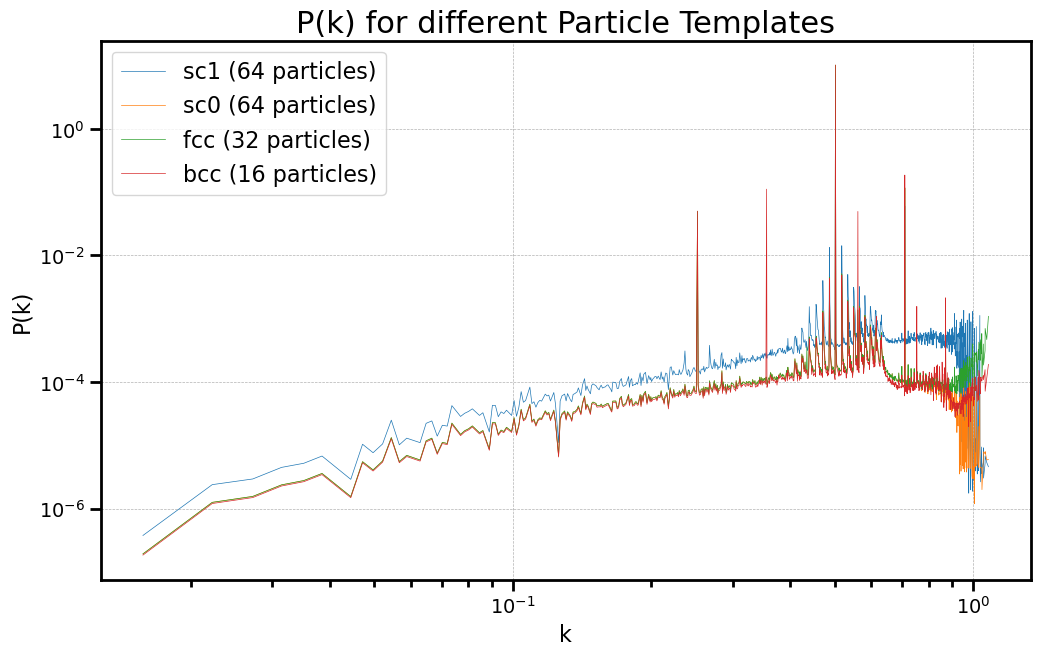

In [8]:
plt.loglog(deltasc1[0][:, 0], deltasc1[0][:, 1], label='sc1 (64 particles)', linewidth=0.5)
plt.loglog(deltasc0[0][:, 0], deltasc0[0][:, 1], label='sc0 (64 particles)', linewidth=0.5)
plt.loglog(deltafcc[0][:, 0], deltafcc[0][:, 1], label='fcc (32 particles)', linewidth=0.5)
plt.loglog(deltabcc[0][:, 0], deltabcc[0][:, 1], label='bcc (16 particles)', linewidth=0.5)

#plt.loglog(arraysc1[0]['k'], (1/(2*np.pi**2))*arraysc1[0]['k']**3*(arraysc1[0]['power'].real), linewidth = 0.7, label = 'Nbodykit sc0 ')
#plt.loglog(arraysc0[0]['k'], (1/(2*np.pi**2))*arraysc0[0]['k']**3*(arraysc0[0]['power'].real), linewidth = 0.7, label = 'Nbodykit sc1 ')
#plt.loglog(arrayfcc[0]['k'], (1/(2*np.pi**2))*arrayfcc[0]['k']**3*(arrayfcc[0]['power'].real), linewidth = 0.7, label = 'Nbodykit fcc ')
#plt.loglog(arrayfcc[0]['k'], (1/(2*np.pi**2))*arrayfcc[0]['k']**3*(arrayfcc[0]['power'].real), linewidth = 0.7, label = 'Nbodykit bcc ')

#plt.loglog(class_data[0][0,:], (1/(2*np.pi**2))*class_data[0][0,:]**3*class_data[0][1,:], linewidth=0.7, label='CLASS, Linear')

#plt.vlines(x=np.pi*120/2000, ymin=10e-7, ymax =10e3, label='nyquist2000', colors='blue')
#plt.vlines(x=np.pi*120/4000, ymin=10e-7, ymax =10e3, label='nyquist4000', colors='purple')
#plt.vlines(x=np.pi*120/8000, ymin=10e-7, ymax =10e3, label='nyquist8000', colors='red')

plt.title('P(k) for different Particle Templates')
plt.ylabel('P(k)')
plt.xlabel('k')
plt.legend()